In [1]:
import numpy as np
import pickle
# load data from 1mil games and train the model
data = np.load('100k/training_set.npz', allow_pickle=True)
val = np.load('100k/validation_set.npz', allow_pickle=True)

In [2]:
trainX = data['X']
trainY = data['y']

In [3]:
valX = val['X']
valY = val['y']

In [4]:
from board_processing import Boardprocessing

# convert the board to a 1D array
trainX1 = np.array([Boardprocessing(board, "V1").get_board_image().reshape(8,8) for board in trainX])
trainX2 = np.array([Boardprocessing(board, "V2").get_board_image().reshape(8, 8) for board in trainX])


In [5]:
valX1 = np.array([Boardprocessing(board, "V1").get_board_image().reshape(8,8) for board in valX])
valX2 = np.array([Boardprocessing(board, "V2").get_board_image().reshape(8,8) for board in valX])

In [145]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def train1(model, optimizer, loss_fn, train_loader, val_loader, num_epochs):
    train_loss = []
    val_loss = []
    cross_loss = []
    train_acc = []
    val_acc = []

    classes = ('0','1','2','3','4','5','6', '7','8','9',)   

    criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        running_acc = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            # convert labels and preds to integers
            int_labels = torch.round(labels * 10).type(torch.LongTensor)
            int_preds = torch.round(preds.float() / 10).type(torch.LongTensor)
            # compute accuracy
            running_acc += torch.sum(int_preds == int_labels)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_acc / len(train_loader.dataset)
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_acc = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                running_acc += torch.sum(preds == labels)

        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_acc / len(val_loader.dataset)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)

        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Loss: {epoch_loss:.4f}, Val Acc: {epoch_acc:.4f}')

    # Return the training history
    return train_loss, train_acc, val_loss, val_acc


In [ ]:
def train(model, optimizer, criterion, train_loader, val_loader, num_epochs, lr=0.0015, momentum=0.9):
    train_loss = []
    val_loss = []
    cross_loss = []
    train_acc = []
    val_acc = []

    optimizer = torch.optim.SGD(model.parameters(), lr=lr , momentum=momentum)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        running_acc = 0.0
        for inputs, labels in train_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_loss.append(epoch_loss)

        # Validation phase
        model.eval()
        running_loss = 0.0
        #running_acc = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                if torch.cuda.is_available():
                        inputs, labels = inputs.cuda(), labels.cuda()
                        
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)

        epoch_loss_v = running_loss / len(val_loader.dataset)

        val_loss.append(epoch_loss_v)

        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f},  Val Loss: {epoch_loss_v:.4f} ')

    # Return the training history
    return train_loss, train_acc, val_loss, val_acc


In [ ]:
def train(model, optimizer, criterion, train_loader, val_loader, num_epochs, lr=0.0015, momentum=0.9):
    train_loss = []
    val_loss = []
    cross_loss = []
    train_acc = []
    val_acc = []

    optimizer = torch.optim.SGD(model.parameters(), lr=lr , momentum=momentum)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        running_acc = 0.0
        for inputs, labels in train_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_loss.append(epoch_loss)

        # Validation phase
        model.eval()
        running_loss = 0.0
        #running_acc = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                if torch.cuda.is_available():
                        inputs, labels = inputs.cuda(), labels.cuda()
                        
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)

        epoch_loss_v = running_loss / len(val_loader.dataset)

        val_loss.append(epoch_loss_v)

        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f},  Val Loss: {epoch_loss_v:.4f} ')

    # Return the training history
    return train_loss, train_acc, val_loss, val_acc


In [83]:
%load_ext autoreload
%autoreload 2
from chesscnn import ChessCNN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#############################################################

V1 Board representation

In [482]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn import preprocessing

from chesscnn import ChessCNN

# Assume you have numpy arrays 
# X_train, y_train, X_val, y_val
X_train = trainX1
y_train = trainY
X_val = valX1
y_val = valY


# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train).float()

X_val_tensor = torch.tensor(X_val).float()
y_val_tensor = torch.tensor(y_val).float()

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create data loaders
batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model, optimizer, and loss function
model = ChessCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

# Train the model
num_epochs = 10
train_loss, train_acc, val_loss, val_acc = train(
    model, optimizer, loss_fn, train_loader, val_loader, num_epochs)


Epoch 1/10, Train Loss: 0.0850,  Val Loss: 0.0821 
Epoch 2/10, Train Loss: 0.0831,  Val Loss: 0.0824 
Epoch 3/10, Train Loss: 0.0821,  Val Loss: 0.0865 
Epoch 4/10, Train Loss: 0.0812,  Val Loss: 0.0795 
Epoch 5/10, Train Loss: 0.0805,  Val Loss: 0.0792 
Epoch 6/10, Train Loss: 0.0799,  Val Loss: 0.0792 
Epoch 7/10, Train Loss: 0.0794,  Val Loss: 0.0783 
Epoch 8/10, Train Loss: 0.0789,  Val Loss: 0.0841 
Epoch 9/10, Train Loss: 0.0785,  Val Loss: 0.0783 
Epoch 10/10, Train Loss: 0.0780,  Val Loss: 0.0780 


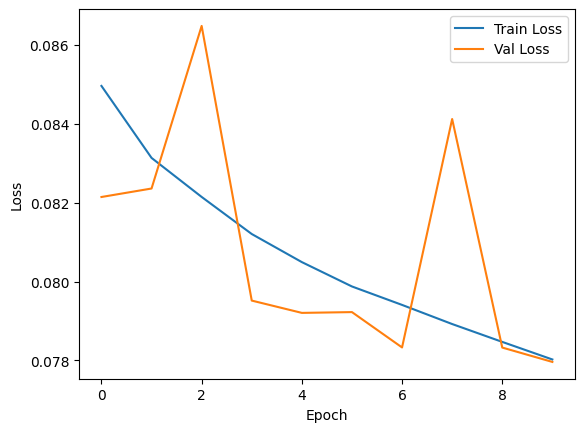

In [485]:
import matplotlib.pyplot as plt

"""

"""


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [486]:
# save the model
torch.save(model.state_dict(), '100k/modelV1_10epoch.pt')

# load the model
model.load_state_dict(torch.load('100k/modelV1_10epoch.pt'))


<All keys matched successfully>

##################################################################

Same data with V2 board representation

In [43]:
# Assume you have numpy arrays 
# X_train, y_train, X_val, y_val
X_train = trainX2[0:1000]
y_train = trainY[0:1000]
X_val = valX2[0:1000]
y_val = valY[0:1000]

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train).float()

X_val_tensor = torch.tensor(X_val).float()
y_val_tensor = torch.tensor(y_val).float()

print(X_train_tensor.shape)

torch.Size([1000, 8, 8])


In [91]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn import preprocessing

from chesscnn import ChessCNN

# Assume you have numpy arrays 
# X_train, y_train, X_val, y_val
X_train = trainX2[0:1000]
y_train = trainY[0:1000]
X_val = valX2[0:1000]
y_val = valY[0:1000]

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train).float()

X_val_tensor = torch.tensor(X_val).float()
y_val_tensor = torch.tensor(y_val).float()

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create data loaders
batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model, optimizer, and loss function
model = ChessCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

# Train the model
num_epochs = 10
train_loss2, train_acc, val_loss2, val_acc = train(
    model, optimizer, loss_fn, train_loader, val_loader, num_epochs)

plt.plot(train_loss2, label='Training loss')
plt.plot(val_loss2, label='Validation loss')
plt.legend(frameon=False)
plt.show()


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [80]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
# import nn
import torch.nn as nn
import torch.nn.functional as F

x = torch.randn(1, 8, 8)

conv1 = nn.Conv2d(1, 64, kernel_size=1, padding=4)
conv2 = nn.Conv2d(64, 128, kernel_size=7)
conv3 = nn.Conv2d(128, 128, kernel_size=1, padding=3)
pool = nn.MaxPool2d(2, 2)
dropout = nn.Dropout(0.2)

fc1 = nn.Linear(64 * 2 * 2, 512)
fc2 = nn.Linear(512, 512)
fc3 = nn.Linear(512, 1)

# apply convolutional layers and activation functions with pooling
x = F.relu(conv1(x))
#x = pool(x)
print(x.shape)
x = F.relu(conv2(x))
#x = pool(x)
print(x.shape)
x = F.relu(conv3(x))
#x = pool(x)
print(x.shape)

x = x.view(x.size(0), -1)
print(x.shape)

x = F.relu(fc1(x))
print(x.shape)
x = F.relu(fc2(x))
print(x.shape)
x = fc3(x)
print(x.shape)



torch.Size([64, 16, 16])
torch.Size([128, 10, 10])
torch.Size([128, 16, 16])
torch.Size([128, 256])
torch.Size([128, 512])
torch.Size([128, 512])
torch.Size([128, 1])
